In [37]:
import pandas as pd

# Membaca file Iris.csv
iris = pd.read_csv('Iris.csv')

In [38]:
# Melihat informasi dataset
iris.info()

# Melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# Menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [40]:
# Memisahkan atribut dan labe
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [42]:
# Evaluasi model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy:', acc_score)

Accuracy: 0.933


In [43]:
# Prediksi model dengan tree_model.predict([['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


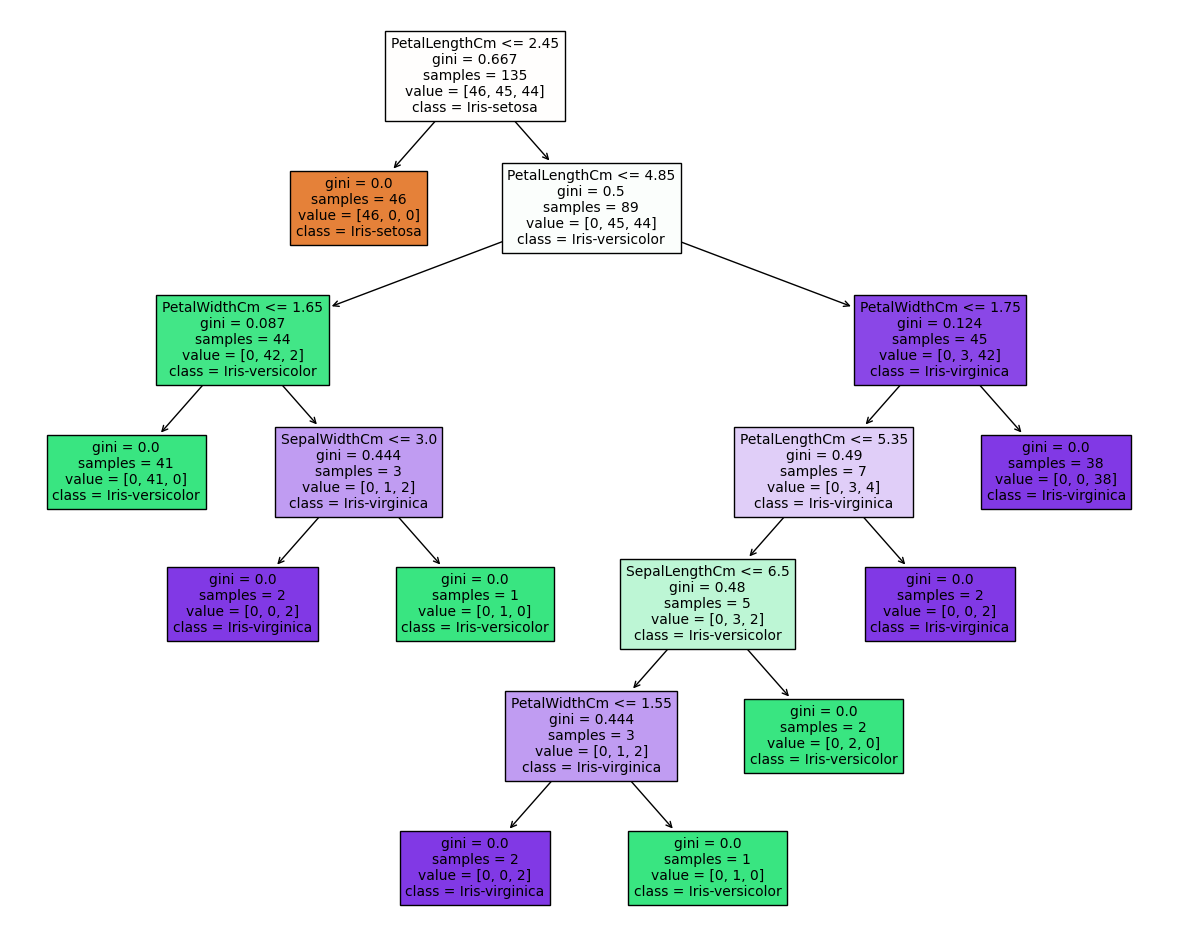

In [44]:
# Visualisasi decision tree dengan plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
y.columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]

# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(tree_model, max_depth=None, fontsize=10, feature_names=X.columns, class_names=y.columns, filled=True);
plt.show()